In [1]:
# Import modules to the Jupyter Notebook
import numpy as np
import pandas as pd
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread
from tqdm import tqdm

In [2]:
# 'Path' object is being created with the directory path 'E:/Education/4 th yr second sem/ind_prj/archive/TB_Chest_Radiography_Database'
data_dir = Path('E:/Education/4 th yr second sem/ind_prj/New data')

In [3]:
data_dir

WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data')

In [4]:
# 'data_dir' is being used to create a new path by appending the subdirectory 'Normal' to it. The '/' operator is used to concatenate the two parts of the path together.This new path is then assigned to the variable 'normal_cases_dir'
normal_cases_dir = data_dir / 'Normal'

In [5]:
# 'data_dir' is being used to create a new path by appending the subdirectory 'Tuberculosis' to it. The '/' operator is used to concatenate the two parts of the path together.This new path is then assigned to the variable 'tuberculosis_cases_dir'
tuberculosis_cases_dir = data_dir / 'Tuberculosis'

In [6]:
# The glob() method returns a generator object that yields the pathnames that match the specified pattern. (normal_cases is a special object called a "generator" )
# The generator will yield the pathnames of all the .png files in the directory represented by the normal_cases_dir Path object.

normal_cases = normal_cases_dir.glob('*png')

In [7]:
# The generator will yield the pathnames of all the .png files in the directory represented by the tuberculosis_cases_dir Path object.

tuberculosis_cases = tuberculosis_cases_dir.glob('*png')

In [8]:
# train_data is an empty list

train_data = []

In [9]:
# This code loops through all the items in the 'normal_cases' list and appends a tuple of the current item and 0 to the 'train_data' DataFrame for each iteration.
# The tuple consists of the current image from the normal_cases list and 0 as label.
for img in normal_cases:
    train_data.append((img,0))

In [10]:
# This code loops through all the items in the 'tuberculosis_cases' list and appends a tuple of the current item and 0 to the 'train_data' DataFrame for each iteration.
# The tuple consists of the current image from the tuberculosis_cases list and 1 as label.
for img in tuberculosis_cases:
    train_data.append((img,1))

In [11]:
# create a data frame called train_data with two columns: 'image' and 'label'. 
train_data = pd.DataFrame(train_data,columns=['image','label'])

In [12]:
#  shuffles the rows of the train_data DataFrame by randomly sampling the DataFrame with a fraction of 1 (i.e., 100% of the data is selected) and then resetting the indices. 
# The drop=True argument is used to prevent the old indices from being added as a new column in the DataFrame.
train_data = train_data.sample(frac=1.).reset_index(drop=True)

In [13]:
# First 20 records of the train_data data frame
train_data.head(20)

,image,label
0,E:\Education\4 th yr second sem\ind_prj\New da...,0
1,E:\Education\4 th yr second sem\ind_prj\New da...,0
2,E:\Education\4 th yr second sem\ind_prj\New da...,0
3,E:\Education\4 th yr second sem\ind_prj\New da...,0
4,E:\Education\4 th yr second sem\ind_prj\New da...,1
5,E:\Education\4 th yr second sem\ind_prj\New da...,0
6,E:\Education\4 th yr second sem\ind_prj\New da...,0
7,E:\Education\4 th yr second sem\ind_prj\New da...,0
8,E:\Education\4 th yr second sem\ind_prj\New da...,0
9,E:\Education\4 th yr second sem\ind_prj\New da...,0


In [14]:
# Number of records and columns in train_data data frame  
train_data.shape

(4557, 2)

In [15]:
# Check value counts of label
cases_count = train_data['label'].value_counts()
cases_count

0    3823
1     734
Name: label, dtype: int64

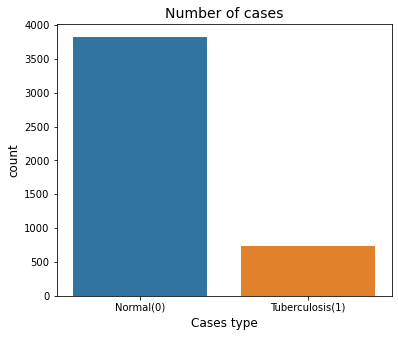

In [16]:
# Bar chart visualize count of each case
plt.figure(figsize=(6,5))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of cases',fontsize=14)
plt.ylabel('count', fontsize=12)
plt.xlabel('Cases type', fontsize=12)
plt.xticks(range(len(cases_count.index)),['Normal(0)','Tuberculosis(1)'])
plt.show()

In [17]:
# selecting a sample of 5 images from a dataset where the label is equal to 1(Tuberculosis images), specifically the image column. 
# The sample is then being converted to a list using the .tolist() method.
Tuberculosis_sample = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
Tuberculosis_sample

[WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Tuberculosis/CHNCXR_0579_1.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Tuberculosis/CHNCXR_0553_1.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Tuberculosis/CHNCXR_0474_1.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Tuberculosis/Tuberculosis-266.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Tuberculosis/CHNCXR_0479_1.png')]

In [18]:
# selecting a sample of 5 images from a dataset where the label is equal to 0 (Normal images), specifically the image column. 
# The sample is then being converted to a list using the .tolist() method.
normal_sample = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
normal_sample

[WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Normal/Normal-1247.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Normal/Normal-2187.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Normal/CHNCXR_0004_0.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Normal/Normal-3349.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Normal/Normal-758.png')]

In [19]:
# Combine normal_sample and Tuberculosis_sample
samples = Tuberculosis_sample + normal_sample
samples

[WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Tuberculosis/CHNCXR_0579_1.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Tuberculosis/CHNCXR_0553_1.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Tuberculosis/CHNCXR_0474_1.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Tuberculosis/Tuberculosis-266.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Tuberculosis/CHNCXR_0479_1.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Normal/Normal-1247.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Normal/Normal-2187.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Normal/CHNCXR_0004_0.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Normal/Normal-3349.png'),
 WindowsPath('E:/Education/4 th yr second sem/ind_prj/New data/Normal/Normal-758.png')]

In [20]:
del Tuberculosis_sample,normal_sample

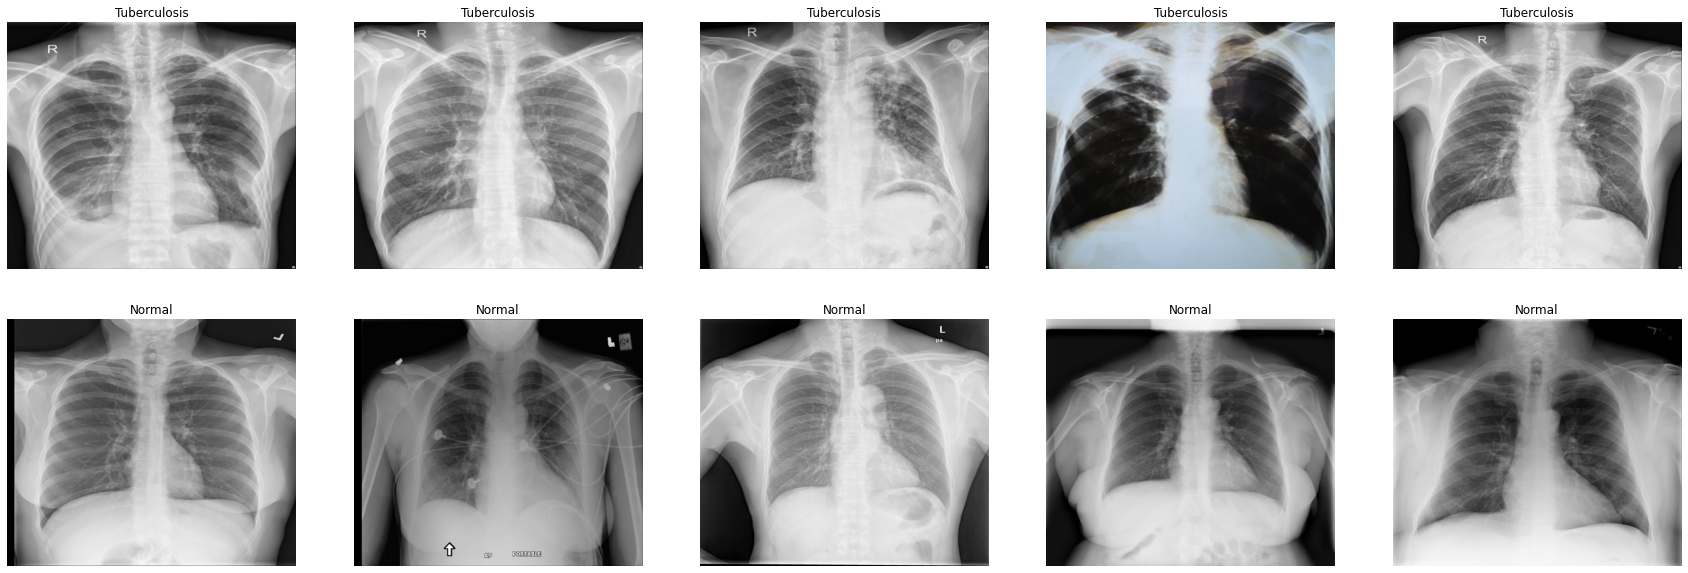

In [21]:
f,ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Tuberculosis")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [22]:
from tqdm import tqdm
from keras.utils.np_utils import to_categorical

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
tuberculosis_cases = tuberculosis_cases_dir.glob('*.png')
train_data = []
train_labels = []

for img in tqdm(normal_cases):
    
    img = cv2.imread(str(img))                   # OpenCV function 'cv2.imread()' is used to read an image file and store it as a numpy array in the variable 'img'.
    
    img = cv2.resize(img, (56,56))               # OpenCV function 'cv2.resize()' is used to change the size of the image stored in the variable 'img'. The image is resized to have a width of 28 pixels and a height of 28 pixels.
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
    img = np.stack((img,)*3, axis=-1)            # Stack three copies of the single-channel image to make it a 3-channel (RGB) image
    
    img = img/255                                # Normalization (Dividing by 255 scales the pixel values between 0 and 1)
    label = 'normal'
    train_data.append(img)
    train_labels.append(label)
                      
# Tuberculosis cases        
for img in tqdm(tuberculosis_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (56,56))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
    img = np.stack((img,)*3, axis=-1)            # Stack three copies of the single-channel image to make it a 3-channel (RGB) image
    
    img = img/255
    label = 'Tuberculosis'
    train_data.append(img)
    train_labels.append(label)
    
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)


3823it [04:58, 12.82it/s]
734it [06:23,  1.92it/s]


Total number of validation examples:  (4557, 56, 56, 3)
Total number of labels: (4557,)


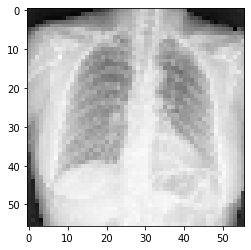

In [23]:
import matplotlib.pyplot as plt

# Get the first image in the array
first_image = train_data1[6]

# Plot the first image
plt.imshow(first_image)
plt.show()

In [24]:
train_data1[1]

array([[[0.09411765, 0.09411765, 0.09411765],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        ...,
        [0.1372549 , 0.1372549 , 0.1372549 ],
        [0.15294118, 0.15294118, 0.15294118],
        [0.2       , 0.2       , 0.2       ]],

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.04705882, 0.04705882, 0.04705882],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.11372549, 0.11372549, 0.11372549],
        [0.1254902 , 0.1254902 , 0.1254902 ],
        [0.17254902, 0.17254902, 0.17254902]],

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.04705882, 0.04705882, 0.04705882],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.10980392, 0.10980392, 0.10980392],
        [0.14117647, 0.14117647, 0.14117647],
        [0.19215686, 0.19215686, 0.19215686]],

       ...,

       [[0.02745098, 0.02745098, 0.02745098],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0

In [25]:
train_data1.shape

(4557, 56, 56, 3)

In [26]:
train_labels1.shape

(4557,)

In [27]:
train_labels1 = pd.DataFrame(train_labels1, columns=['label'], index=None)
train_labels1.head(10)

,label
0,normal
1,normal
2,normal
3,normal
4,normal
5,normal
6,normal
7,normal
8,normal
9,normal


In [28]:
train_labels1.tail(10)

,label
4547,Tuberculosis
4548,Tuberculosis
4549,Tuberculosis
4550,Tuberculosis
4551,Tuberculosis
4552,Tuberculosis
4553,Tuberculosis
4554,Tuberculosis
4555,Tuberculosis
4556,Tuberculosis


In [29]:
# convert normal and Tuberculosis label names into 0 and 1.
train_labels1['label'] = train_labels1['label'].map({'normal':0,'Tuberculosis':1})
train_labels1

,label
0,0
1,0
2,0
3,0
4,0
...,...
4552,1
4553,1
4554,1
4555,1


In [30]:
# get the unique values of label column
train_labels1['label'].unique()

array([0, 1], dtype=int64)

In [31]:
#!pip install imblearn

In [32]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

In [33]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

0    3823
1    3823
Name: label, dtype: int64


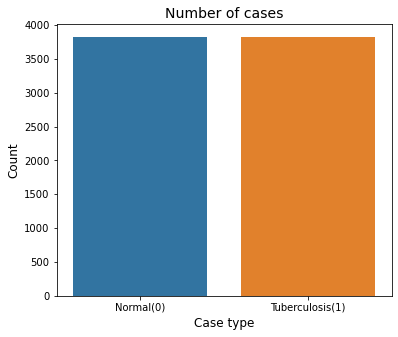

In [34]:
# Plot the results 
plt.figure(figsize=(6,5))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()

In [35]:
train_data2.shape

(7646, 9408)

In [36]:
train_labels2.shape

(7646, 1)

In [37]:
train_labels2 

,label
0,0
1,0
2,0
3,0
4,0
...,...
7641,1
7642,1
7643,1
7644,1


In [38]:
train_data2 =train_data2.reshape(-1,56,56,3)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.2, random_state=42)

In [40]:
X_train.shape

(6116, 56, 56, 3)

In [41]:
X_test.shape

(1530, 56, 56, 3)

In [42]:
y_test.value_counts()

label
0        783
1        747
dtype: int64

In [43]:
# creates a sequential model in TensorFlow's Keras library called "data_augmentation.
#  The model consists of three layers
#  "RandomFlip" layer that horizontally flips the input image
#  "RandomRotation" layer that randomly rotates the input image by up to 0.1 radians
#  "RandomZoom" layer that randomly zooms the input image by up to 10%.
#  These layers are used for data augmentation to improve the performance of a model by creating new, artificially generated images based on the original image.


from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(56,
                                  56,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
      
  ]
)

In [44]:
# creates a sequential model using the TensorFlow library
# The model consists of a series of layers, including data augmentation, three convolutional layers, and two max pooling layers. 
#  The activation function used is 'relu'
#  max pooling layers are used to reduce the spatial dimensions of the feature maps, allowing the network to focus on the most important features.
# The convolutional layers are used to extract features from the input image,
# The convolutional layers use a kernel size of (3,3) and have 28, 64 and 64 filters respectively.

import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(56,56, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 56, 56, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)       

In [45]:
# first, a Flatten() layer is added. This layer takes the 3D feature maps output by the previous convolutional layers and converts them into a 1D vector
# This code adds several layers to the previously created CNN model.
# Flatten() layer takes the 3D feature maps output by the previous convolutional layers and converts them into a 1D vector,
# which can be used as input to the next layers.
# Then, two fully connected 'Dense()' layers are added. first layer having 640 neurons and the second having 564 neurons
# Two Dropout() layers are added with a rate of 0.5. 
# The dropout layer is used to prevent overfitting by randomly dropping out a percentage of neurons during training, so the network is not too dependent on any one feature.
# Then, two more Dense() layers are added, with 64 neurons each. The activation function used for the first is 'tanh' and the second is 'sigmoid' which is a non-linear function that maps the input to a value between 0 and 1
# A final Dense() layer is added with 2 neurons, which is the output layer. This output layer will output a probability for each of the 2 classes in the dataset.

model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(564, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 56, 56, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)       

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(y_train), epochs=20, validation_data=(np.array(X_test), np.array(y_test)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

Epoch 1/20
192/192 [==============================] - 211s 247ms/step - loss: 0.4229 - accuracy: 0.7891 - val_loss: 0.2825 - val_accuracy: 0.8739
Epoch 2/20
192/192 [==============================] - 44s 227ms/step - loss: 0.3044 - accuracy: 0.8679 - val_loss: 0.2597 - val_accuracy: 0.8987
Epoch 3/20
192/192 [==============================] - 41s 216ms/step - loss: 0.2585 - accuracy: 0.8900 - val_loss: 0.2196 - val_accuracy: 0.9124
Epoch 4/20
192/192 [==============================] - 41s 213ms/step - loss: 0.2336 - accuracy: 0.9012 - val_loss: 0.2305 - val_accuracy: 0.9098
Epoch 5/20
192/192 [==============================] - 41s 213ms/step - loss: 0.2347 - accuracy: 0.9037 - val_loss: 0.3230 - val_accuracy: 0.8641
Epoch 6/20
192/192 [==============================] - 41s 211ms/step - loss: 0.2127 - accuracy: 0.9163 - val_loss: 0.2160 - val_accuracy: 0.9039
Epoch 7/20
192/192 [==============================] - 40s 210ms/step - loss: 0.2093 - accuracy: 0.9107 - val_loss: 0.2446 - val_a

In [47]:
y_pred = model.predict(np.array(X_test))
y_pred = np.argmax(y_pred, axis=1)

48/48 [==============================] - 12s 43ms/step


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[735  48]
 [ 41 706]]


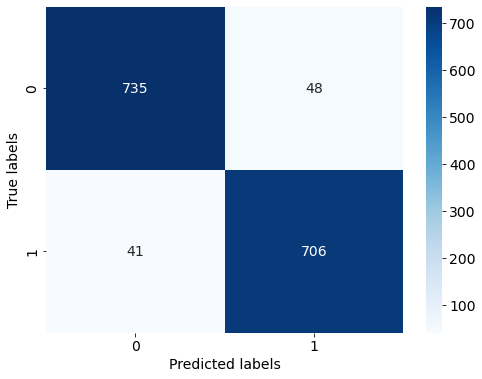

In [50]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
fig.set_size_inches(8, 6)
plt.show()


In [51]:
# precison
precision = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[0][1])
precision

0.9363395225464191

In [52]:
# Recall 
Recall = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])
Recall

0.9451137884872824

In [53]:
import matplotlib.pyplot as plt

history = model.fit(np.array(X_train), np.array(y_train), epochs=30, validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/30
192/192 [==============================] - 67s 264ms/step - loss: 0.1478 - accuracy: 0.9415 - val_loss: 0.2718 - val_accuracy: 0.8915
Epoch 2/30
192/192 [==============================] - 42s 217ms/step - loss: 0.1531 - accuracy: 0.9398 - val_loss: 0.2271 - val_accuracy: 0.9176
Epoch 3/30
192/192 [==============================] - 41s 213ms/step - loss: 0.1405 - accuracy: 0.9423 - val_loss: 0.2300 - val_accuracy: 0.8993
Epoch 4/30
192/192 [==============================] - 41s 211ms/step - loss: 0.1465 - accuracy: 0.9433 - val_loss: 0.1722 - val_accuracy: 0.9346
Epoch 5/30
192/192 [==============================] - 41s 213ms/step - loss: 0.1513 - accuracy: 0.9411 - val_loss: 0.1884 - val_accuracy: 0.9294
Epoch 6/30
192/192 [==============================] - 40s 210ms/step - loss: 0.1437 - accuracy: 0.9452 - val_loss: 0.2257 - val_accuracy: 0.9098
Epoch 7/30
192/192 [==============================] - 40s 209ms/step - loss: 0.1434 - accuracy: 0.9452 - val_loss: 0.4256 - val_ac

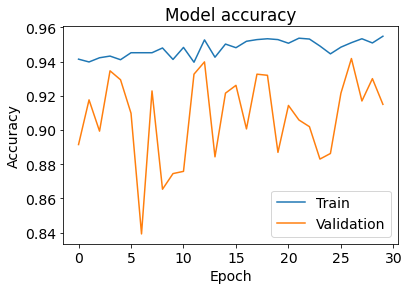

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

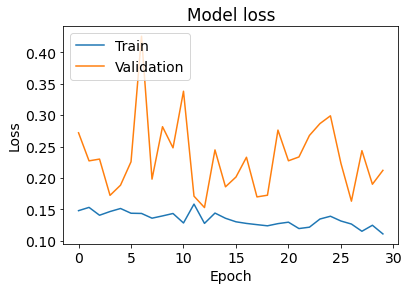

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       783
           1       0.94      0.95      0.94       747

    accuracy                           0.94      1530
   macro avg       0.94      0.94      0.94      1530
weighted avg       0.94      0.94      0.94      1530

